In [16]:
#do clustering here, parts b) and c)

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

import matplotlib.pyplot as plt

In [2]:
full_df = pd.read_csv('data.csv')
df = full_df.drop(columns=['_stemmed', '_title'])
display(full_df)

,aanmdof,aanmdof robot,abandon,abattoir,abe,abe scheme,abil,abil detect,abil learn,abil model,...,zip,zipper,zolb,zone,zupt,zynq,œuf,μm,_stemmed,_title
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,anomali detect wide area imageri studi detect ...,Anomaly detection in wide area imagery
1,0.0,0.0,0.0,0.0,0.0,0.0,0.023310,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,person re-identif deep kronecker-product match...,Person re-identification with deep kronecker-p...
2,0.0,0.0,0.0,0.0,0.0,0.0,0.084704,0.153873,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,crack detect imag masonri use cnn signific bod...,Crack detection in images of masonry using cnns
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,toward energi effici code gener mobil phone us...,Towards an energy efficient code generator for...
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,sub-polyhedr schedul use unit- two-variable-pe...,Sub-polyhedral scheduling using (Unit-)two-var...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.06849,0.0,0.0,0.0,0.0,colorimetr point-of-car paper-bas sensor urina...,Colorimetric point-of-care paper-based sensors...
1139,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,calcium identif score base echocardiographi ex...,Calcium identification and scoring based on ec...
1140,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,consid filter import irreplac filter prune dee...,Considering filter importance and irreplaceabi...
1141,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,low-complex bit-seri sequenti polynomi basi fi...,Low-complexity bit-serial sequential polynomia...


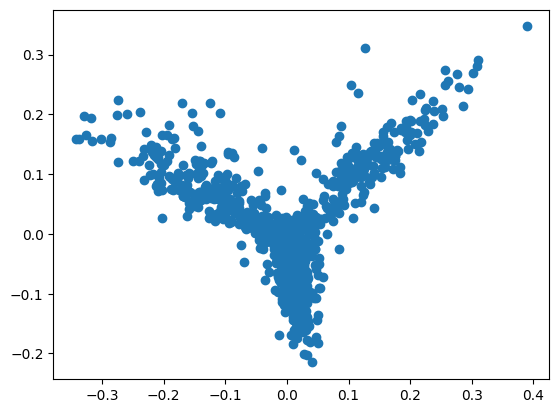

In [3]:
pca = PCA(n_components=2).fit_transform(df)
plt.scatter(pca[:, 0], pca[:, 1])

# no idea why plot looks this way

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


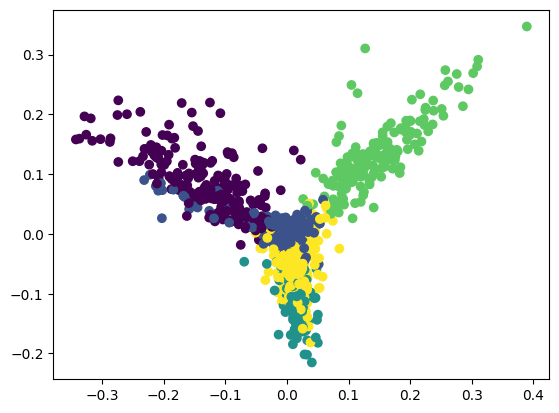

Davies-Bouldin score: 8.58313610005825
Top words for each cluster:


secur           0.088195
encrypt         0.057850
scheme          0.046553
quantum         0.043684
key             0.042433
cryptographi    0.042150
protocol        0.037620
attack          0.035690
data            0.031583
iot             0.031061
propos          0.029955
use             0.026428
authent         0.025251
cloud           0.024204
algorithm       0.023005
imag            0.022445
cryptograph     0.022387
system          0.021860
implement       0.021711
comput          0.021153
chaotic         0.020383
devic           0.020090
secret          0.019396
base            0.018941
commun          0.017905
privaci         0.017598
effici          0.016923
share           0.015986
provid          0.015804
bas             0.015587
dtype: float64

compil       0.090738
program      0.049936
code         0.038391
languag      0.037401
quantum      0.029615
optim        0.028058
graph        0.027378
memori       0.026326
parallel     0.025313
comput       0.023180
use          0.022082
transform    0.021481
implement    0.021154
regist       0.019571
processor    0.019234
algorithm    0.017482
gener        0.016883
theori       0.016858
loop         0.016498
design       0.016192
schedul      0.016191
level        0.016147
oper         0.015572
time         0.015278
type         0.015056
instruct     0.015048
softwar      0.014899
system       0.014843
problem      0.014691
execut       0.014578
dtype: float64

robot           0.147400
control         0.040007
soft            0.030090
system          0.025655
task            0.024899
environ         0.020874
learn           0.020488
human           0.019935
simul           0.019514
use             0.019274
model           0.016940
actuat          0.016856
soft robot      0.016843
develop         0.016434
materi          0.016283
optim           0.015093
manipul         0.014653
adapt           0.014613
approach        0.014613
perform         0.014393
evolv           0.014023
industri        0.013809
motion          0.013737
design          0.013445
robot system    0.013297
forc            0.013194
gait            0.012992
work            0.012949
experi          0.012909
interact        0.012851
dtype: float64

databas          0.137599
data             0.072471
relat            0.069942
queri            0.067543
relat databas    0.057618
sql              0.037969
ontolog          0.033498
system           0.031279
model            0.028018
inform           0.027375
schema           0.027364
approach         0.026306
use              0.023373
manag            0.022119
store            0.020970
graph            0.020823
process          0.019631
web              0.018818
user             0.018168
languag          0.017553
inform system    0.016598
semant           0.016476
rdb              0.016049
structur         0.015517
propos           0.015019
watermark        0.014946
design           0.014918
storag           0.014762
nosql            0.014650
normal           0.014289
dtype: float64

imag             0.039138
detect           0.032814
method           0.028443
vision           0.027006
use              0.024198
model            0.023894
object           0.022460
learn            0.022290
comput vision    0.021570
system           0.021053
comput           0.020067
network          0.019790
deep             0.019770
propos           0.019640
video            0.018501
track            0.018428
featur           0.017132
dataset          0.016952
perform          0.016599
accuraci         0.016380
visual           0.016368
algorithm        0.015999
train            0.015427
segment          0.015002
data             0.014856
measur           0.014814
base             0.014367
deep learn       0.014309
camera           0.014110
result           0.013877
dtype: float64

In [27]:
# 3 and 5 give most meaningful results
K = 5

kmeans = KMeans(n_clusters=K)
kmeans.fit(df)
y_pred = kmeans.predict(df)
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

print('Davies-Bouldin score:', davies_bouldin_score(df, y_pred))

df_pred = df.copy()
df_pred['_cluster'] = y_pred

print('Top words for each cluster:')
for i in range(K):
    display(df_pred[df_pred['_cluster'] == i].drop(columns='_cluster').mean().sort_values(ascending=False).iloc[:30])
    
# With K = 3 documents are split into 3 topics: Computer Vision, Databases and Cryptography

# K = 4 didn't work really well in my opinion

# With K = 5 documents are split into 5 topics: Programming Languages, Cryptography, Databases, Robotics, Computer Vision

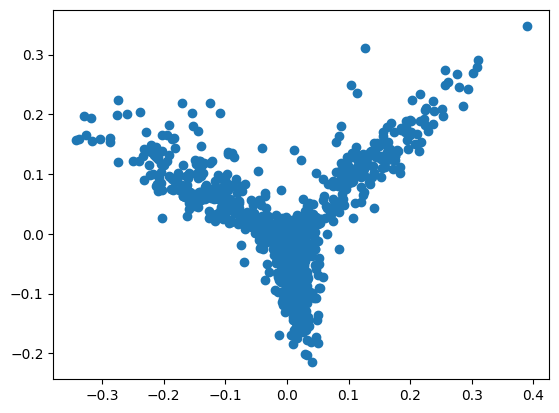

In [14]:
#part c
#Dimension reduction

pca_2 = PCA(n_components=2).fit_transform(df)
plt.scatter(pca_2[:, 0], pca_2[:, 1])

# no idea why plot looks this way

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


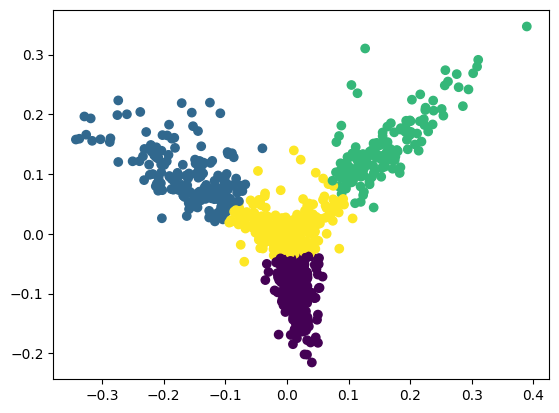

Davies-Bouldin score: 0.6367800135520303
Top words for each cluster:


robot     0.052541
imag      0.027215
detect    0.026090
method    0.025260
learn     0.024682
use       0.023661
model     0.022944
object    0.020701
system    0.020073
vision    0.019644
dtype: float64

secur           0.093722
quantum         0.082520
encrypt         0.053372
scheme          0.046061
key             0.044418
cryptographi    0.041504
protocol        0.036304
attack          0.035956
iot             0.034749
data            0.029413
dtype: float64

databas          0.148719
relat            0.076786
data             0.076521
queri            0.072645
relat databas    0.063434
sql              0.038971
ontolog          0.036571
system           0.032101
schema           0.030394
approach         0.027962
dtype: float64

compil     0.050894
program    0.029854
code       0.023659
languag    0.023495
system     0.023247
use        0.022522
data       0.020338
graph      0.018938
comput     0.017819
optim      0.017775
dtype: float64

In [16]:
#part c

# 3 and 5 give most meaningful results
K_2 = 3

kmeans = KMeans(n_clusters=K_2)
kmeans.fit(pca_2)
y_pred_2 = kmeans.predict(pca_2)
plt.scatter(pca_2[:, 0], pca_2[:, 1], c=y_pred_2)
#plt.savefig("/Users/behramulukir/Desktop/School and Texts/Aalto University/Studies/Third Year/First Semester/Methods of Data Mining D (CS-E4650)/Group Exercises/Exercise 5/images/pcak4.png")

plt.show()

print('Davies-Bouldin score:', davies_bouldin_score(pca_2, y_pred_2))

df_pred_2 = df.copy()
df_pred_2['_cluster'] = y_pred_2

print('Top words for each cluster:')
for i in range(K_2):
    display(df_pred_2[df_pred_2['_cluster'] == i].drop(columns='_cluster').mean().sort_values(ascending=False).iloc[:10])
    
# With K = 3 documents are split into 3 topics: Computer Vision, Databases and Cryptography

# With K = 4 documents are split into 4 topics: Robotics, Programming Languages, Databases, and Cryptography

# With K = 5 documents are split into 5 topics: Programming Languages, Cryptography, Databases, Robotics, Computer Vision